In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

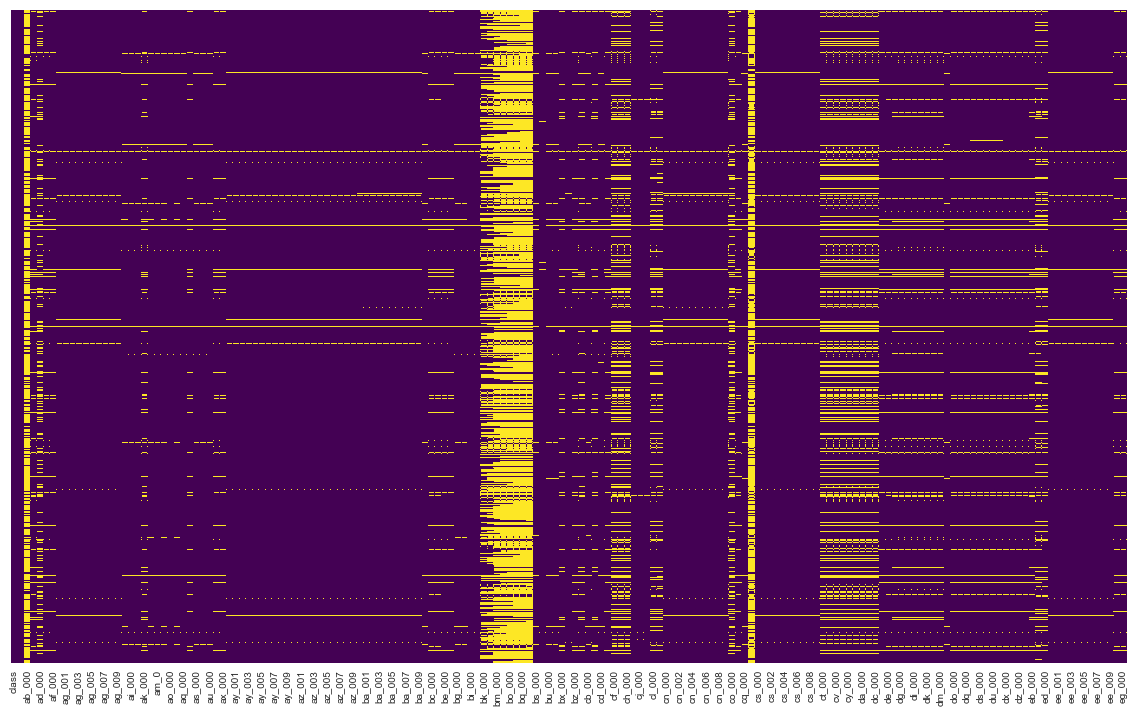

In [3]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>First Approach</b>

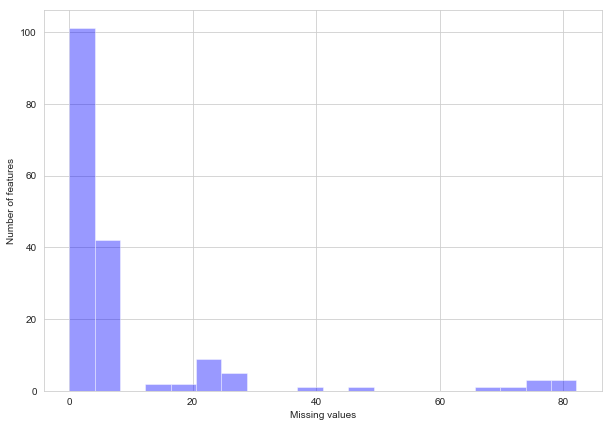

In [4]:
missing_training_data = training_data.isna().sum().div(training_data.shape[0]).mul(100).to_frame()

plt.figure(figsize=(10,7))
ax= sns.distplot(missing_training_data[0],kde = False,bins = 20,color='b')
ax.set(xlabel='Missing values', ylabel='Number of features')
plt.show()

In [5]:
missing_training_data[missing_training_data[0]>80]

,0
bq_000,81.203333
br_000,82.106667


<b>we are dropping the columns that have more than 80% missing values</b>

In [6]:
temp = missing_training_data[missing_training_data[0]>80]
temp = list(temp.index)

sample_training_data = training_data.drop(temp,axis=1)
sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


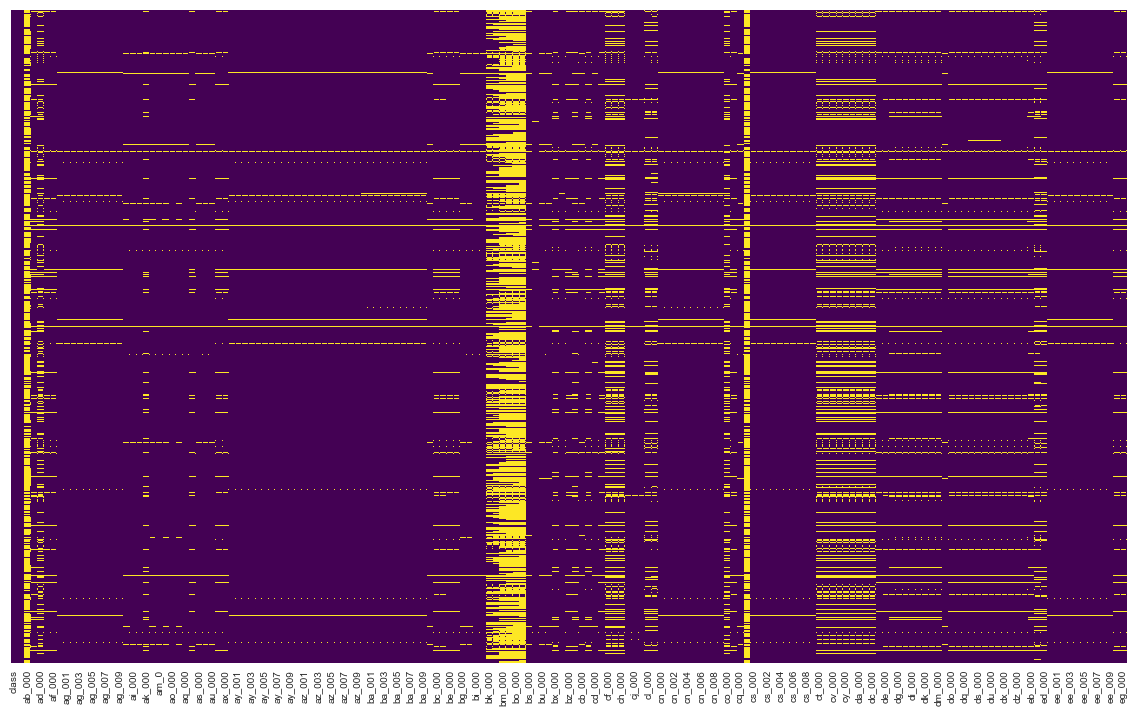

In [7]:
plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Here we can see not that much improvement than the first approach in the heatmap</b><br>
For the rest of the values we are going to replace them with their mean() -- (**Ref)

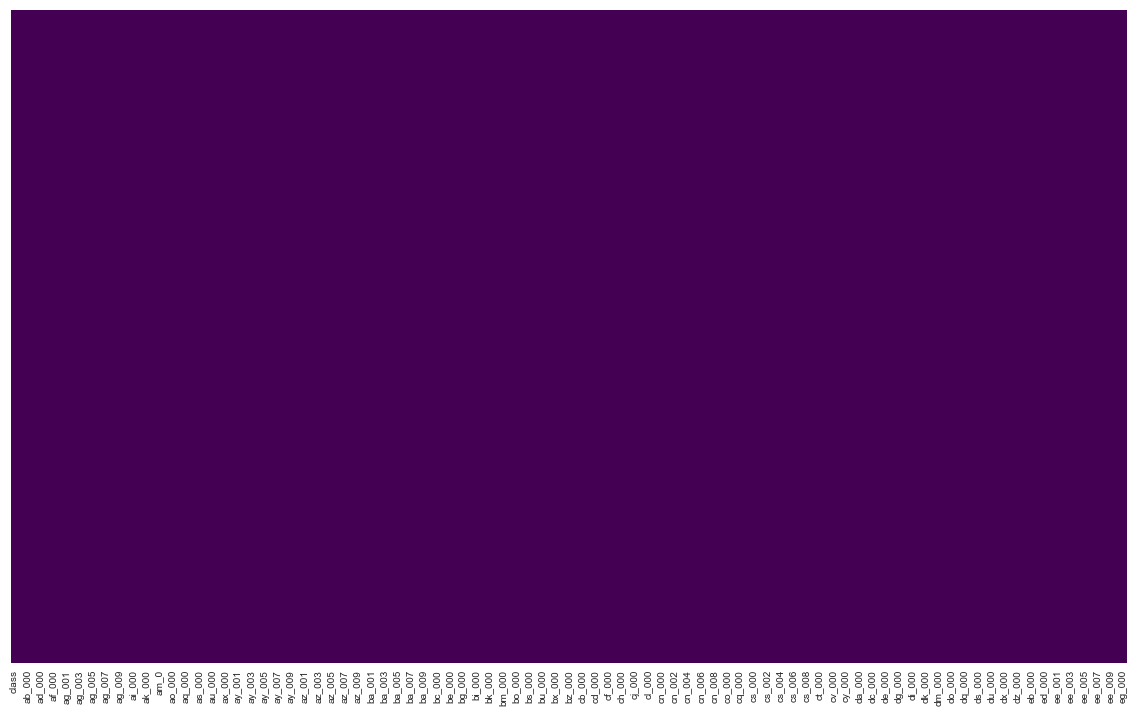

In [8]:
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>So, for the first approach, the data is ready to go </b>

In [9]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,0,14,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,102960,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,0,78696,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [10]:
sample_training_data_FA = sample_training_data
sample_training_data_FA.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [11]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [12]:
temp = missing_training_data[missing_training_data[0]>80]
temp = list(temp.index)

sample_testing_data_FA = testing_data.drop(temp,axis=1)
sample_testing_data_FA.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


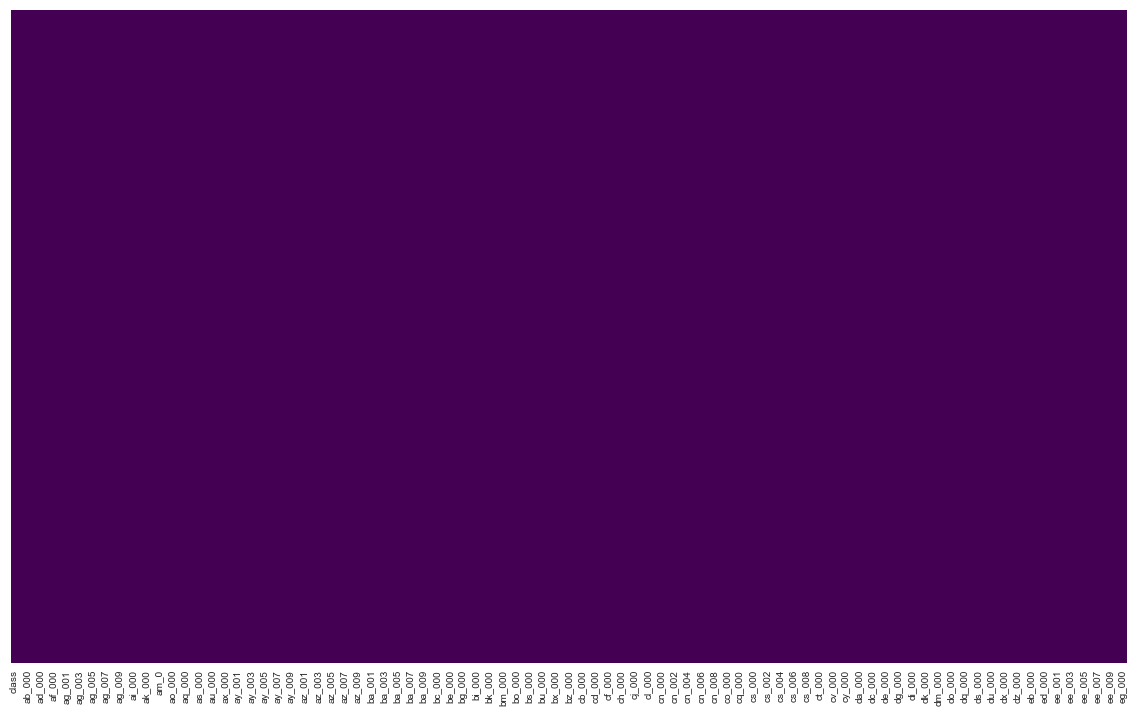

In [13]:
sample_testing_data_FA.fillna(sample_testing_data_FA.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data_FA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data_FA = sample_testing_data_FA.replace('neg',0)
sample_testing_data_FA = sample_testing_data_FA.replace('pos',1)

sample_testing_data_FA.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.098000e+03,138.000000,412.000000,654.000000,7.800000e+01,88.000000,0.000000e+00,0.000000,0.0,0.0
1,0,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.068000e+03,276.000000,1620.000000,116.000000,8.600000e+01,462.000000,0.000000e+00,0.000000,0.0,0.0
2,0,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.000000,0.000000,0.000000,...,4.950760e+05,380368.000000,440134.000000,269556.000000,1.315022e+06,153680.000000,5.160000e+02,0.000000,0.0,0.0
3,0,59816,0.772065,1.010000e+03,936.0,0.0,0.0,0.000000,0.000000,0.000000,...,5.408200e+05,243270.000000,483302.000000,485332.000000,4.313760e+05,210074.000000,2.816620e+05,3232.000000,0.0,0.0
4,0,1814,0.772065,1.560000e+02,140.0,0.0,0.0,0.000000,0.000000,0.000000,...,7.646000e+03,4144.000000,18466.000000,49782.000000,3.176000e+03,482.000000,7.600000e+01,0.000000,0.0,0.0
5,0,174,0.772065,2.600000e+01,24.0,0.0,0.0,120.858516,2064.203656,13792.360509,...,4.649135e+05,221200.962424,469088.572495,425669.551746,3.559239e+05,352401.430668,1.442759e+05,8560.354884,0.0,0.0
6,0,40202,0.772065,6.400000e+02,606.0,0.0,0.0,0.000000,0.000000,0.000000,...,5.262180e+05,239734.000000,439556.000000,374248.000000,1.690960e+05,53658.000000,4.105400e+04,320.000000,0.0,0.0
7,0,120278,0.772065,2.130706e+09,256.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.006722e+06,459658.000000,876356.000000,689532.000000,5.685400e+05,500624.000000,1.006628e+06,34820.000000,0.0,0.0
8,0,14592,0.000000,2.130706e+09,162.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.050240e+05,57398.000000,49152.000000,38256.000000,2.432680e+05,145144.000000,0.000000e+00,0.000000,0.0,0.0
9,0,28338,0.772065,2.130706e+09,238.0,0.0,0.0,0.000000,0.000000,0.000000,...,3.570060e+05,150056.000000,264776.000000,239282.000000,1.405480e+05,74750.000000,3.295800e+04,84.000000,0.0,0.0


# Model Implemetation for First Approach

In [15]:
#here the predictors (X) and responce (y) is separated from the sample_data for this model
X = sample_training_data_FA.drop('class',axis=1)
y = sample_training_data_FA['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
logmodel = LogisticRegression()

In [18]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
regularPrediction = logmodel.predict(X_test)

In [20]:
print(classification_report(y_test,regularPrediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17691
           1       0.44      0.17      0.24       309

   micro avg       0.98      0.98      0.98     18000
   macro avg       0.71      0.58      0.62     18000
weighted avg       0.98      0.98      0.98     18000



In [21]:
print(metrics.accuracy_score(y_test, regularPrediction))

0.982


In [22]:
print(metrics.r2_score(y_test, regularPrediction)) # as the ans is negative , so reverese correlation

-0.0668580864714825


In [23]:
print(metrics.f1_score(y_test, regularPrediction))

0.23943661971830985


In [24]:
#testing error
print(metrics.mean_squared_error(y_test, regularPrediction)) 

0.018


In [25]:
#Training error
temp = logmodel.predict(X_train)
mean_squared_error(y_train,temp)

0.016428571428571428

In [26]:
#confusion matrix
print(confusion_matrix(y_test,regularPrediction))

[[17625    66]
 [  258    51]]


In [27]:
tn, fp, fn, tp = confusion_matrix(y_test,regularPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,17625,66
TP,258,51


In [28]:

cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,129660,66,258


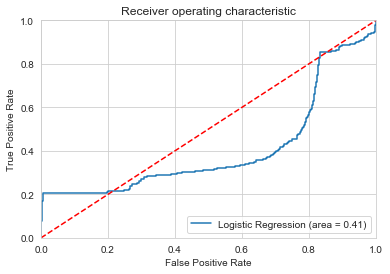

In [29]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
#wtih different threshold
THRESHOLD = 0.42 #optimal one chosen manually

thresholdPrediction = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1,0)


tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,124020,152,245


# Testing Data implementation 

In [31]:
testData_X = sample_testing_data_FA.drop('class',axis=1)
testData_y = sample_testing_data_FA['class']

In [32]:
#as the logmodel is already fitted with training data X_train and y_train so,
testDataPrediction = logmodel.predict(testData_X)

In [33]:
print(classification_report(testData_y,testDataPrediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15625
           1       0.54      0.16      0.25       375

   micro avg       0.98      0.98      0.98     16000
   macro avg       0.76      0.58      0.62     16000
weighted avg       0.97      0.98      0.97     16000



In [34]:
print(metrics.accuracy_score(testData_y, testDataPrediction)) #almost same

0.977125


In [35]:
print(metrics.r2_score(testData_y, testDataPrediction)) # improved

0.0005760000000000209


In [36]:
print(metrics.f1_score(testData_y, testDataPrediction)) #improved

0.24691358024691357


In [37]:
#testing error
print(metrics.mean_squared_error(testData_y, testDataPrediction)) #testing error increased 

0.022875


In [38]:
#Training error
temp = logmodel.predict(X_train)
mean_squared_error(y_train,temp) #will be same

0.016428571428571428

In [39]:
#confusion matrix
print(confusion_matrix(testData_y, testDataPrediction))

[[15574    51]
 [  315    60]]


In [40]:
tn, fp, fn, tp = confusion_matrix(testData_y, testDataPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,15574,51
TP,315,60


In [41]:
#without modified threshold
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,158010,51,315


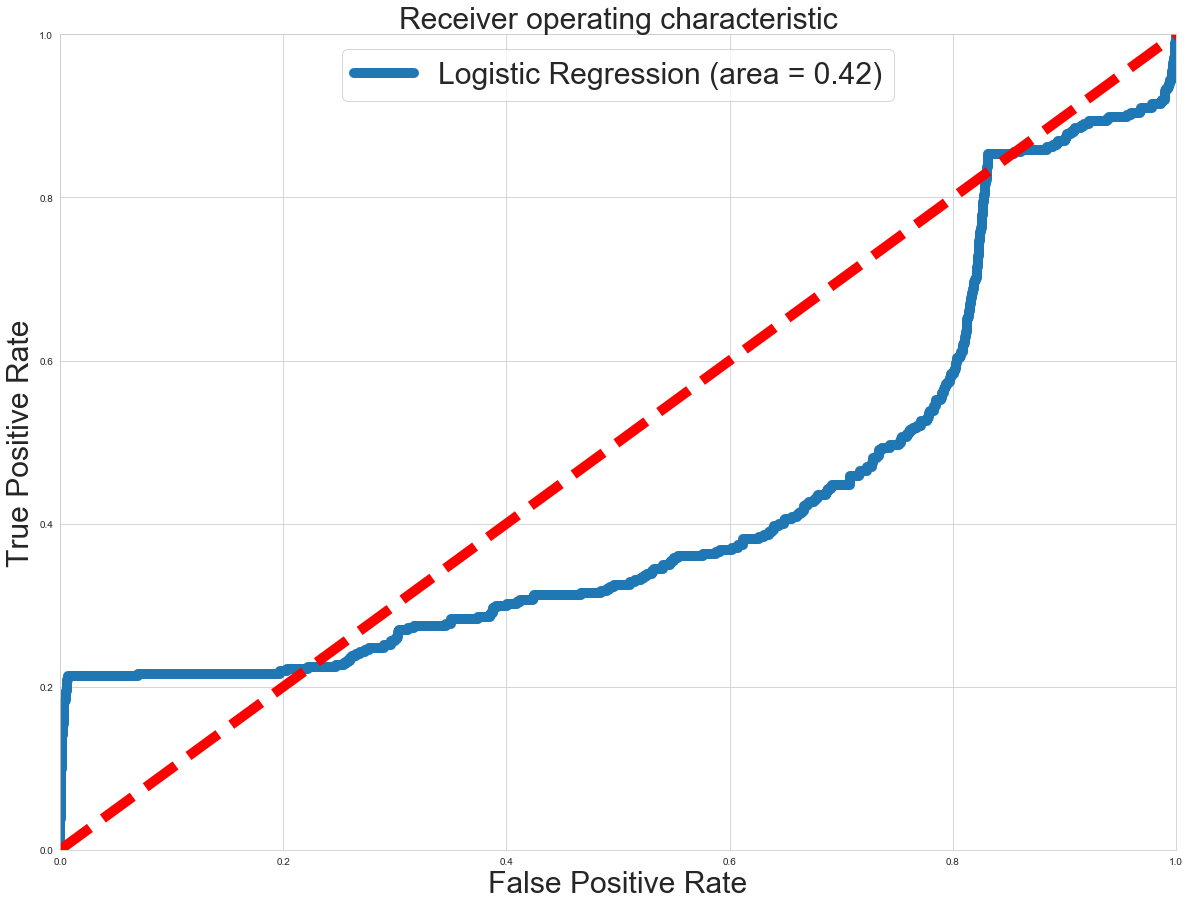

In [52]:
logit_roc_auc = roc_auc_score(testData_y, logmodel.predict_proba(testData_X)[:,1])
fpr, tpr, thresholds = roc_curve(testData_y,logmodel.predict_proba(testData_X)[:,1])
plt.figure(figsize=(20,15))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc,linewidth = 10)
plt.plot([0, 1], [0, 1],'r--',linewidth = 10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize = 30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.title('Receiver operating characteristic',fontsize = 30)
plt.legend(loc="upper center",fontsize = 30)
plt.savefig('Log_ROC')
plt.show()

In [43]:
#wtih different threshold
THRESHOLD = 0.42 #optimal one chosen manually

thresholdTestingPrediction = np.where(logmodel.predict_proba(testData_X)[:,1] > THRESHOLD, 1,0)


testing_tn, testing_fp, testing_fn, testing_tp = confusion_matrix(testData_y,thresholdTestingPrediction).ravel()
testing_cost = 10*testing_fp+500*testing_fn
testing_values = {'Score':[testing_cost],'Number of Type 1 faults':[testing_fp],'Number of Type 2 faults':[testing_fn]}
pd.DataFrame(testing_values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,148630,113,295


# So the final score is 148630

# Now with CV folds

In [44]:
CV_prediction = cross_val_predict(LogisticRegression(),X,y,cv=5)
CV_score = cross_val_score(LogisticRegression(),X,y,cv=5)

In [45]:
#mean cross validation score  
np.mean(CV_score)

0.9842666666666666

In [46]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59000
           1       0.58      0.21      0.30      1000

   micro avg       0.98      0.98      0.98     60000
   macro avg       0.78      0.60      0.65     60000
weighted avg       0.98      0.98      0.98     60000



In [47]:
tn, fp, fn, tp = confusion_matrix(y, CV_prediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,58849,151
TP,793,207


In [48]:

cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,398010,151,793
